#Preprocessing

*   Import Library

Men-import library yang dibutuhkan dalam proses machine learning

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#Load Dataset
Membaca dataset

In [7]:
df=pd.read_csv('Dataset/iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


Melihat type data tiap column

In [8]:
df.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

Men-cek jumlah dataset pada setiap column

In [9]:
df.count()

Id               150
SepalLengthCm    150
SepalWidthCm     150
PetalLengthCm    150
PetalWidthCm     150
Species          150
dtype: int64

Meratakan setiap nilai column berdasarkan spesies

In [10]:
df.groupby('Species').mean().head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Species,,,,,
Iris-setosa,25.5,5.006,3.418,1.464,0.244
Iris-versicolor,75.5,5.936,2.770,4.260,1.326
Iris-virginica,125.5,6.588,2.974,5.552,2.026


Menampilkan data dalam bentuk plot scatter dan bar

<BarContainer object of 150 artists>

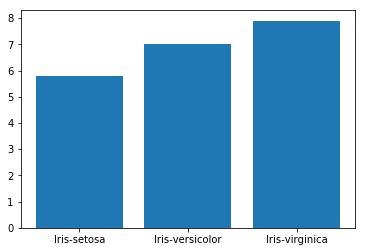

In [11]:
plt.bar(df.Species, df.SepalLengthCm)

<BarContainer object of 150 artists>

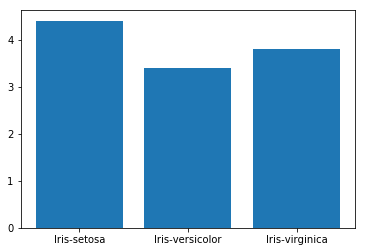

In [12]:
plt.bar(df.Species, df.SepalWidthCm)

<BarContainer object of 150 artists>

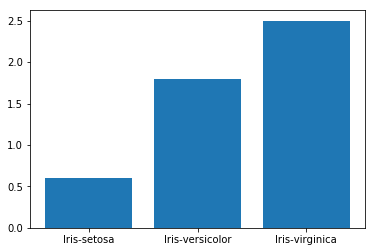

In [13]:
plt.bar(df.Species, df.PetalWidthCm)

<BarContainer object of 150 artists>

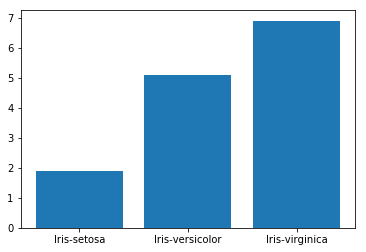

In [14]:
plt.bar(df.Species, df.PetalLengthCm)

Text(0, 0.5, 'Lebar Sepal (cm)')

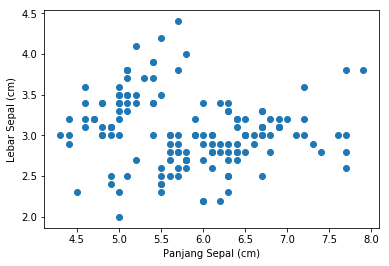

In [15]:
plt.scatter(df['SepalLengthCm'],df['SepalWidthCm'])
plt.xlabel('Panjang Sepal (cm)')
plt.ylabel('Lebar Sepal (cm)')

Text(0, 0.5, 'Lebar Petal (cm)')

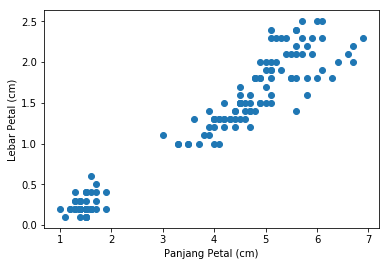

In [16]:
plt.scatter(df['PetalLengthCm'],df['PetalWidthCm'])
plt.xlabel('Panjang Petal (cm)')
plt.ylabel('Lebar Petal (cm)')

Membuat dua data dimana X merupakan data Independent dan y merupakan variabel dependent 

In [17]:
X = df.drop(['Species', 'Id'], axis=1).values
y = df.Species.values

Melakukan label encoder (membuat value string menjadi nilai integer) pada data y

In [18]:
from sklearn import preprocessing
le_sp = preprocessing.LabelEncoder()
le_sp.fit(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'])
y = le_sp.transform(y)

Memecah data menjadi dua dengan menggunakan sklearn dengan data test berjumlah 20% dari data train

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)
print('Data X_train = ', X_train.shape, 'Data y_train =', y_train.shape)
print('Data X_test = ', X_test.shape, 'Data y_test =', y_test.shape)

Data X_train =  (120, 4) Data y_train = (120,)
Data X_test =  (30, 4) Data y_test = (30,)


#Evaluating

Men-Import library sklearn.neighbors karena metode klasifikasi yang digunakan adalah KNN

In [20]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

Men-inisialisasi jumlah K, nilai rerata mean_acc, scores , dan nilai std_acc 

In [21]:
Ks = 15
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
scores = []

Menggunakan metode KNN, dan mencari nilai K yang optimal sehingga diperoleh data yang akurat

In [22]:
for n in range(1,Ks): 
    knn = KNeighborsClassifier(n_neighbors = n)
    knn.fit(X_train, y_train)
    yhat = knn.predict(X_test) 
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])
    scores.append(metrics.accuracy_score(y_test,yhat))

Visualisasi data diperoleh nilai K lalu mencari nilai akurasi yang tertinggi dari perbandingan data test dengan data prediksi 

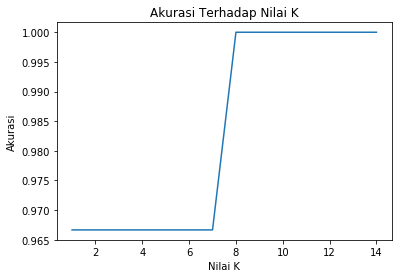

In [23]:
plt.plot(range(1,Ks), scores)
plt.xlabel('Nilai K')
plt.ylabel('Akurasi')
plt.title('Akurasi Terhadap Nilai K')
plt.show()

Selanjutnya menampilkan data dalam confusion matrix dengan men-import library sklearn.metrics

In [24]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools

Membuat fungsi untuk memplot data dalam bentuk tabel confussion matrix

In [25]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Selanjutnya memasukkan kembali metode KNN dengan nilai K yang optimal (n_neighbors = 6) kemudian tarnsform kedalam confussion matrix kemudian plot tabel confusion matrix

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.92      0.96        13
           2       0.88      1.00      0.93         7

   micro avg       0.97      0.97      0.97        30
   macro avg       0.96      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30

Confusion matrix, without normalization
[[10  0  0]
 [ 0 12  1]
 [ 0  0  7]]


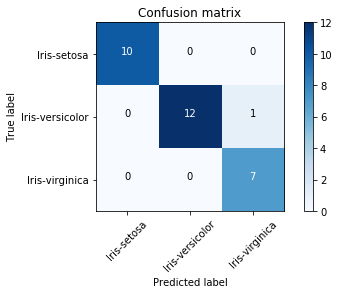

In [26]:
knn = KNeighborsClassifier(n_neighbors = 6)
knn.fit(X_train, y_train)
yhat = knn.predict(X_test)

cnf_matrix = confusion_matrix(y_test, yhat, labels=[0,1,2])
np.set_printoptions(precision=3)

print (classification_report(y_test, yhat))

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=df.Species.unique(),normalize= False,  title='Confusion matrix')

Menampilkan data prediski dan data test dengan scatter plot

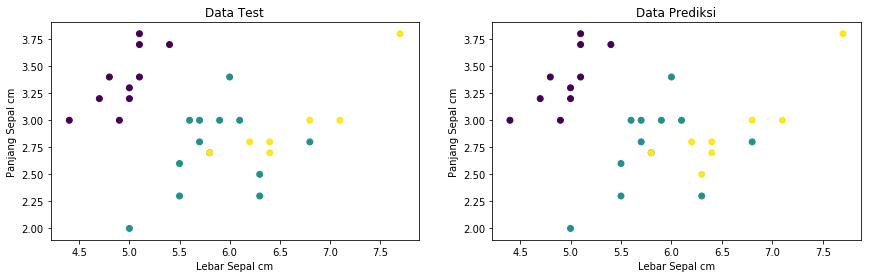

In [27]:
plt.subplot(1,2,1)
plt.scatter(X_test[:,0], X_test[:,1], c=y_test)
plt.ylabel('Panjang Sepal cm')
plt.xlabel('Lebar Sepal cm')
plt.title('Data Test')
plt.subplot(1,2,2)
plt.subplots_adjust(right = 2)
plt.scatter(X_test[:,0], X_test[:,1], c=yhat)
plt.ylabel('Panjang Sepal cm')
plt.xlabel('Lebar Sepal cm')
plt.title('Data Prediksi')
plt.show()